# Figure S1k-m

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

import replay_structure.structure_models as models
import replay_structure.metadata as meta 
import replay_structure.read_write as read_write

import importlib

In [2]:
SMALL_SIZE = 5
MEDIUM_SIZE = 6
BIGGER_SIZE = 7

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
data_type = meta.Ripple_Data
n_emission_models = 2
random_effects_all = np.zeros((meta.N_SESSIONS, meta.N_MODELS*n_emission_models))
random_effects_models = np.zeros((meta.N_SESSIONS, meta.N_MODELS))
random_effects_emissions = np.zeros((meta.N_SESSIONS, n_emission_models))

p_exceedance_all = np.zeros((meta.N_SESSIONS, meta.N_MODELS*n_emission_models))
p_exceedance_models = np.zeros((meta.N_SESSIONS, meta.N_MODELS))
p_exceedance_emissions = np.zeros((meta.N_SESSIONS, n_emission_models))

for i, session in enumerate(meta.Session_List):#,1,3,4,5]):
    mc_results = read_write.load_factorial_model_comparison_results(session, data_type.default_time_window_ms, data_type.name)
    random_effects_all[i] = mc_results.random_effects_results["p_all_models"]
    random_effects_models[i] = mc_results.random_effects_results["p_dynamics_models"]
    random_effects_emissions[i] = mc_results.random_effects_results["p_emission_models"]
    
    p_exceedance_all[i] = mc_results.random_effects_results["p_exceedance_all"]
    p_exceedance_models[i] = mc_results.random_effects_results["p_exceedance_dynamics"]
    p_exceedance_emissions[i] = mc_results.random_effects_results["p_exceedance_emissions"]

loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/ripples/rat1day1_4cm_3ms_factorial_model_comparison.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/ripples/rat1day2_4cm_3ms_factorial_model_comparison.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/ripples/rat2day1_4cm_3ms_factorial_model_comparison.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/ripples/rat2day2_4cm_3ms_factorial_model_comparison.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/ripples/rat3day1_4cm_3ms_factorial_model_comparison.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/ripples/rat3day2_4cm_3ms_factorial_model_comparison.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/ripples/rat4day1_4cm_3ms_factorial_model_comparison.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/

In [4]:
n_emission_models = 2
random_effects_factorial = np.zeros((len(meta.Simulated_Session_List)*2, meta.N_MODELS*n_emission_models))

for i, session in enumerate(meta.Simulated_Session_List):
    mc_results = read_write.load_factorial_model_comparison_results(
        session, meta.Poisson_Simulated_Ripple_Data.default_time_window_ms, meta.Poisson_Simulated_Ripple_Data.name)
    random_effects_factorial[i*2] = mc_results.random_effects_results["p_all_models"]
    
for i, session in enumerate(meta.Simulated_Session_List):
    mc_results = read_write.load_factorial_model_comparison_results(
        session, meta.NegBinomial_Simulated_Ripple_Data.default_time_window_ms, meta.NegBinomial_Simulated_Ripple_Data.name)
    random_effects_factorial[i*2+1] = mc_results.random_effects_results["p_all_models"]

loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/poisson_simulated_ripples/diffusion_4cm_3ms_factorial_model_comparison.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/poisson_simulated_ripples/momentum_4cm_3ms_factorial_model_comparison.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/poisson_simulated_ripples/stationary_4cm_3ms_factorial_model_comparison.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/poisson_simulated_ripples/stationary_gaussian_4cm_3ms_factorial_model_comparison.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/poisson_simulated_ripples/random_4cm_3ms_factorial_model_comparison.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/negbinomial_simulated_ripples/diffusion_4cm_3ms_factorial_model_comparison.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/negbino

In [5]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    # From https://stackoverflow.com/a/18926541
    new_cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

cmap_use = truncate_colormap(matplotlib.cm.magma, minval=.1, maxval=1)

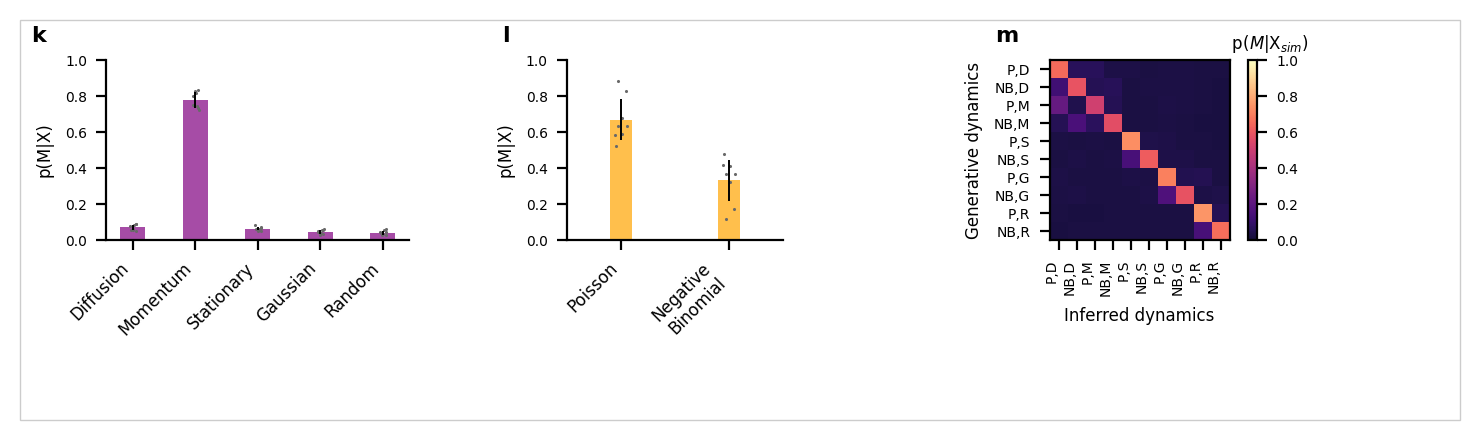

In [6]:
figure_width = 7.2
figure_height = 2
margin = 0.06
header_height = 0.1
footer_height = 0.45

w_spacing = 0.11

# define plot dimensions (relative to a "1x1" plot for a marginal)
panel1_width = .21
panel2_width = .15
panel3_width = .25#.2
# panel4_width = .21

panel_height = 1 - header_height - footer_height

panel1_left = margin
panel2_left = margin + panel1_width + w_spacing
panel3_left = margin + panel1_width + panel2_width + 2*w_spacing

panel_bottom = footer_height

fig = plt.figure(
    figsize=(figure_width, figure_height), dpi=200, facecolor="w", edgecolor="k"
)
ax = dict()
ax[0] = fig.add_axes([panel1_left, panel_bottom, panel1_width, panel_height])
ax[1] = fig.add_axes([panel2_left, panel_bottom, panel2_width, panel_height])
ax[2] = fig.add_axes([panel3_left, panel_bottom, panel3_width, panel_height])

data_type_plot = {'ripples': 'SWRs', 'placefield_rotation': 'Place field rotation', 'placefieldID_shuffle': 'Neuron ID shuffle'}

model_names_dict = {'diffusion': 'Diffusion', 
               'momentum': 'Momentum', 
               'stationary': 'Stationary', 
               'stationary_gaussian': 'Gaussian', 
               'random': 'Random'}
model_names = [model_names_dict[model] for model in meta.MODELS_AS_STR]

j = 0
p_models_mean = np.mean(random_effects_models, axis=0)
p_models_sd = np.std(random_effects_models, axis=0)
ax[j].bar(np.arange(meta.N_MODELS), p_models_mean, yerr=p_models_sd,
        width=.4, label=data_type_plot[str(data_type.name)], color='purple', alpha=.7, error_kw=dict(lw=.7, zorder=101))
for s in range(meta.N_SESSIONS):
    ax[j].scatter(np.arange(meta.N_MODELS)+(np.random.rand()-.5)/8, random_effects_models[s], s=5, color='dimgray', zorder=100, marker='.', linewidths=0)

ax[j].set_ylabel("p(M|X)")

ax[j].set_xticks(np.arange(meta.N_MODELS))
ax[j].set_ylim([0,1])
ax[j].set_xticklabels(model_names, rotation=45, ha='right', fontsize=6)

ax[j].spines['top'].set_visible(False)
ax[j].spines['right'].set_visible(False)


j = 1
i = 0
p_models_mean = np.mean(random_effects_emissions, axis=0)
p_models_sd = np.std(random_effects_emissions, axis=0)
ax[j].bar(np.arange(n_emission_models), p_models_mean, yerr=p_models_sd,
        width=.2, label=data_type_plot[str(data_type.name)], color='orange', alpha=.7, error_kw=dict(lw=.7, zorder=101))
for s in range(meta.N_SESSIONS):
    ax[j].scatter(np.arange(n_emission_models)+(np.random.rand()-.5)/8, random_effects_emissions[s], s=5, color='dimgray', zorder=100, marker='.', linewidths=0)

ax[j].set_ylabel("p(M|X)")

ax[j].set_xticks(np.arange(n_emission_models))
ax[j].set_ylim([0,1])
ax[j].set_xlim([-.5, 1.5])
ax[j].set_xticklabels(['Poisson', 'Negative\nBinomial'], rotation=45, ha='right', fontsize=6)

ax[j].spines['top'].set_visible(False)
ax[j].spines['right'].set_visible(False)


j = 2


xy_axis = np.arange(meta.N_MODELS*2)
im = ax[j].imshow(random_effects_factorial, vmin=0, vmax=1, cmap=cmap_use)

model_names = ["D", "M", "S", "G", "R"]
emission_names = ["P", "NB"]


modelemission_names = [f"{model}, {emission}" for model in model_names for emission in emission_names]
modelemission_names = []
for model in model_names:
    for emission in emission_names:
        if emission == "P":
            modelemission_names.append(f"{emission},{model}")
        elif emission == "NB":
            modelemission_names.append(f"{emission},{model}")

ax[j].set_xticks(xy_axis)
ax[j].set_xticklabels(modelemission_names, rotation=90, ha='right')
ax[j].set_yticks(xy_axis)
ax[j].set_yticklabels(modelemission_names, rotation=0, ha='right')
ax[j].set_ylabel("Generative dynamics")
ax[j].set_xlabel("Inferred dynamics")

cbar = fig.colorbar(im, ax=ax[j])
cbar.ax.set_title('       p($M$|X$_{sim}$)', fontsize=6, pad=4)
cbar.ax.tick_params(labelsize=5)

ax[0].text(-.25,1.1, 'k', size=8, transform=ax[0].transAxes, fontweight='bold')
ax[1].text(-.3,1.1, 'l', size=8, transform=ax[1].transAxes, fontweight='bold')
ax[2].text(-.3,1.1, 'm', size=8, transform=ax[2].transAxes, fontweight='bold')


plt.savefig(os.path.join(meta.FIGURES_PATH, "FigureS1k-m.svg"), dpi=500, transparent=True)


rect = plt.Rectangle(
    # (lower-left corner), width, height
    (0, 0), 1, 1, fill=False, color="k", lw=.5, alpha=.2,
    zorder=1000, transform=fig.transFigure, figure=fig
)
fig.patches.extend([rect])